In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import json 
import os
import matplotlib.pyplot as plt
import nltk
import statistics  as sts
%matplotlib inline 

from urllib.request import urlopen
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/datasets/e-commerce/'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

/content/drive/MyDrive/datasets/e-commerce/olist_customers_dataset.csv
/content/drive/MyDrive/datasets/e-commerce/olist_geolocation_dataset.csv
/content/drive/MyDrive/datasets/e-commerce/olist_order_items_dataset.csv
/content/drive/MyDrive/datasets/e-commerce/olist_order_payments_dataset.csv
/content/drive/MyDrive/datasets/e-commerce/olist_orders_dataset.csv
/content/drive/MyDrive/datasets/e-commerce/olist_order_reviews_dataset.csv
/content/drive/MyDrive/datasets/e-commerce/olist_products_dataset.csv
/content/drive/MyDrive/datasets/e-commerce/product_category_name_translation.csv
/content/drive/MyDrive/datasets/e-commerce/olist_sellers_dataset.csv


In [12]:
raw_path = "/content/drive/MyDrive/datasets/e-commerce/"

customers = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
geolocalization = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
order_payments = pd.read_csv(raw_path +'olist_order_payments_dataset.csv')
order_reviews = pd.read_csv(raw_path +'olist_order_reviews_dataset.csv')
orders=pd.read_csv(raw_path + 'olist_orders_dataset.csv')
products_dataset=pd.read_csv(raw_path + 'olist_products_dataset.csv')
sellers_dataset=pd.read_csv(raw_path + 'olist_sellers_dataset.csv')
translation=pd.read_csv(raw_path + 'product_category_name_translation.csv')

# **Top Payment type**

In [13]:
#Removendo not_defined
order_payments.loc[order_payments['payment_type'] == 'not_defined', 'payment_type'] = 'credit_card'
order_payments.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

payment_type
boleto          2869361.27
credit_card    12542084.19
debit_card       217989.79
voucher          379436.87
Name: payment_value, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



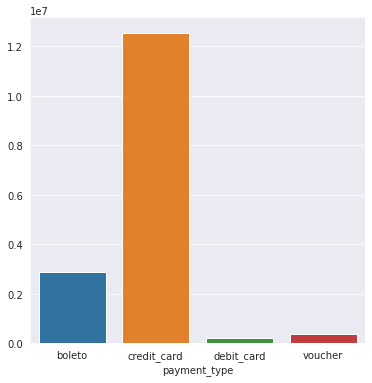

In [14]:
x1 = order_payments.payment_type.value_counts()
x = (order_payments.payment_type)
y = round(order_payments.groupby('payment_type')['payment_value'].sum(), 2)
y2 = order_payments.groupby('payment_type').size().sort_values()

print(y)
fig = plt.figure(figsize=(6,6))
sns.set_style('darkgrid')
sns.barplot(y.index, y.values)
plt.show()

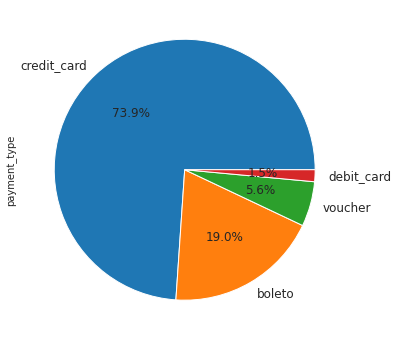

In [15]:
order_payments['payment_type'].value_counts().plot(
    kind='pie',
    autopct="%1.1f%%",
    fontsize=(12),
    figsize=(6,6)
)

plt.show()

# **Top Category**

In [75]:
print('--> ' + str(len(products_dataset.product_category_name.unique())) + ' Products category')
print(products_dataset.product_category_name.unique())

--> 74 Products category
['perfumaria' 'artes' 'esporte_lazer' 'bebes' 'utilidades_domesticas'
 'instrumentos_musicais' 'cool_stuff' 'moveis_decoracao'
 'eletrodomesticos' 'brinquedos' 'cama_mesa_banho'
 'construcao_ferramentas_seguranca' 'informatica_acessorios'
 'beleza_saude' 'malas_acessorios' 'ferramentas_jardim'
 'moveis_escritorio' 'automotivo' 'eletronicos' 'fashion_calcados'
 'telefonia' 'papelaria' 'fashion_bolsas_e_acessorios' 'pcs'
 'casa_construcao' 'relogios_presentes'
 'construcao_ferramentas_construcao' 'pet_shop' 'eletroportateis'
 'agro_industria_e_comercio' nan 'moveis_sala' 'sinalizacao_e_seguranca'
 'climatizacao' 'consoles_games' 'livros_interesse_geral'
 'construcao_ferramentas_ferramentas' 'fashion_underwear_e_moda_praia'
 'fashion_roupa_masculina'
 'moveis_cozinha_area_de_servico_jantar_e_jardim'
 'industria_comercio_e_negocios' 'telefonia_fixa'
 'construcao_ferramentas_iluminacao' 'livros_tecnicos'
 'eletrodomesticos_2' 'artigos_de_festas' 'bebidas' 'market_pl

In [47]:
products_dataset['product_category_name'].value_counts().sort_values(ascending=False).head(10)

cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_category_name, dtype: int64

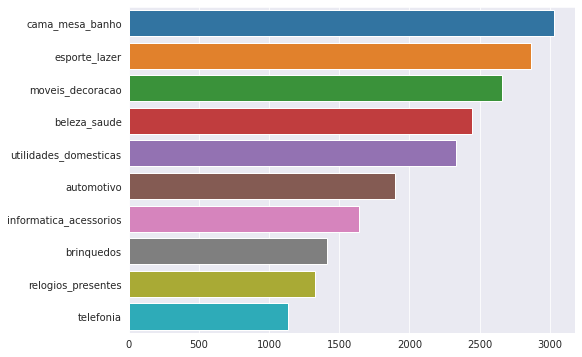

In [55]:
top_category = products_dataset['product_category_name'].value_counts().sort_values(ascending=False)[:10]

fig = plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.barplot(y=top_category.index, x=top_category.values)
plt.show()

# **Freight**

In [17]:
round(order_items['freight_value'].corr(order_items['price']), 2)

0.41

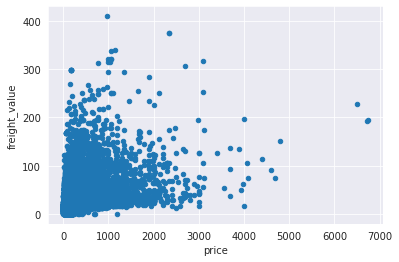

In [18]:
order_items.plot(
    kind = 'scatter',
    x = 'price',
    y = 'freight_value'
)

plt.show()

In [19]:
x = order_items.drop('price', axis = 1 )
y = order_items.price

**Modelo preditivo**

In [20]:
# Separando base para teste e treino
x_treino, x_teste, y_treino, y_teste = train_test_split(x[['freight_value']], order_items.price, test_size = 0.7, random_state = 5)
print(x_treino.shape)

(33795, 1)


In [21]:
# Treinando modelo
regr = LinearRegression()
regr.fit(x_treino, y_treino)
pred_teste = regr.predict(x_teste)

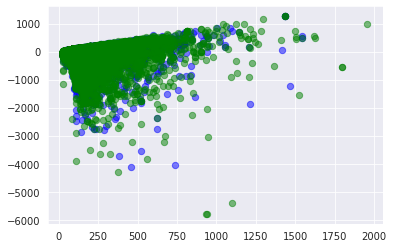

In [22]:
#
plt.scatter(regr.predict(x_treino), regr.predict(x_treino) - y_treino, c = 'b', s=40, alpha=0.5)
plt.scatter(regr.predict(x_teste), regr.predict(x_teste) - y_teste, c = 'g', s=40, alpha=0.5)
plt.show()

**TensorFlow**

In [23]:
import tensorflow as tf

In [24]:
train_x, test_x = np.asarray(train_test_split(order_items[['freight_value']], test_size=0.6, random_state=5 ))
train_y, test_y = np.asarray(train_test_split(order_items[['price']], test_size=0.6, random_state=5))
n_samples = train_x.shape[0]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [25]:
regr_2 = LinearRegression()
regr_2.fit(train_x, train_y)
pred_test = regr_2.predict(test_x)

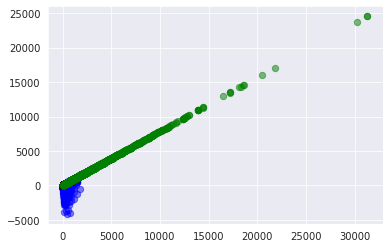

In [26]:
#
plt.scatter(regr_2.predict(train_x), regr_2.predict(train_x) - train_y, c = 'b', s=40, alpha=0.5)
plt.scatter(regr_2.predict(test_y), regr_2.predict(test_y) - test_y, c = 'g', s=40, alpha=0.5)
plt.show()

In [27]:
order_payments['payment_type'].value_counts()

credit_card    76798
boleto         19784
voucher         5775
debit_card      1529
Name: payment_type, dtype: int64

# **Top Cities**

In [43]:
customers[["customer_id","customer_city"]].groupby("customer_city").count().sort_values(by=['customer_id'], ascending=False).head(10)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
campinas,1444
porto alegre,1379
salvador,1245
guarulhos,1189


In [50]:
top_cities = customers["customer_city"].value_counts().sort_values(ascending=False)[:5]

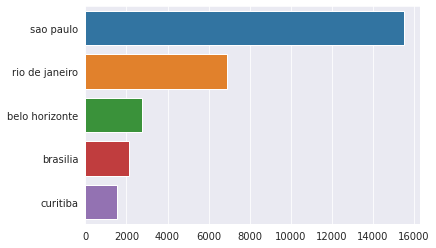

In [51]:
sns.set_style('darkgrid')
sns.barplot(y=top_cities.index, x=top_cities.values)
plt.show()

# **Top State**

In [35]:
customers[["customer_id","customer_state"]].groupby("customer_state").count().sort_values(by=['customer_id'], ascending=False).head(10)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [48]:
top_states = customers["customer_state"].value_counts().sort_values(ascending=False)[:5]

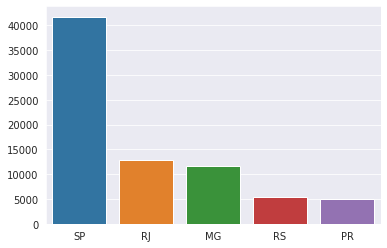

In [49]:
sns.set_style('darkgrid')
sns.barplot(y=top_states.values, x=top_states.index)
plt.show()